#**Final Project - Web Intelligence**

## Analysing Movie: Encanto 

*  Stephanie Rodriguez Osorio 
*  Antonio J. Segura García 


## Introduction & motivation


Movies are one of the topics that have an amount of reaction around internet, from the social media networks to the news pages or blogs. Relevant aspects of a film that could be interesting are the music, visual efects even though the posibility to obtain an award, these could generate in people diverse emotions or reactions that they exposed online.    

Base on these, we decide to develop our final project in a film that have been realeased resently, that is animated as well as we find enjoyble. This work is about an analysis of Encanto film perception in different social networks and it presence on the internet.

## Data adquisition corpus (API Twitter)

*In this section is about to do the requery for the comments from Twitter, Export and Import streamed comments using the keywords about Encanto movie and it Oscar Nomination*

In [ ]:
!pip install tweepy

In [ ]:
import tweepy
import json
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy.streaming import StreamListener
 
class MyListener(StreamListener):
    
    def __init__(self, api=None, max_tweets=10, json_tweets_file=None):
        super(StreamListener, self).__init__()
        self.num_tweets = 0
        self.max_tweets = max_tweets
        self.json_tweets_file = json_tweets_file

    def on_data(self, data):
        try:
            with open(self.json_tweets_file, 'a') as f:
                f.write(data) # This will store the whole JSON data in the file, you can perform some JSON filters
                twitter_text = json.loads(data)['text'] # You can also print your tweets here
                print (twitter_text.replace('\n',' ').replace('\r',' '))
                self.num_tweets += 1
                if self.num_tweets < self.max_tweets:
                    return True
                else:
                    return False
        except BaseException as e:
            print("Error on_data: %s" % str(e))
        return True

    def on_error(self, status):
        print('Error :', status)
        return False

#Values with your keys
consumer_key = XXX
consumer_secret = XXX
access_token = XXX
access_secret = XXX

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret) 

In [ ]:
keywords = ["Oscars","encanto movie","Nominees"] #["Dos Oruguitas","encanto movie"] #["We don't talk about bruno","encanto movie"]
json_tweets_file = '_'.join(keywords)+'.jsonl'

# value to retrieve tweets 
max_tweets = 100 

twitter_stream = Stream(auth, MyListener(json_tweets_file = json_tweets_file, max_tweets = max_tweets))

# Add keywords 
twitter_stream.filter(track=keywords) 

print('_______ End _______')

*Import temporal streamed data*

In [ ]:
import pandas as pd

with open(json_tweets_file) as f:
    lines = f.read().splitlines()

df_inter = pd.DataFrame(lines)
df_inter.columns = ['json_element']    
df_inter['json_element'].apply(json.loads)
df = pd.json_normalize(df_inter['json_element'].apply(json.loads))
print (len(df),'tweets')
df.head()

##Import data from stored corpus documents and merge

*A folder "WI_corpus" in the root of google Drive is required*


*WI_corpus is a shared folder that acts as a collection in a documents data base*


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

!cd "/content/drive/My Drive/WI_corpus"
import pandas as pd
import json
import re
sources = !ls "/content/drive/My Drive/WI_corpus"

print(sources)
files_path = "/content/drive/My Drive/WI_corpus/"
sources = [re.sub('\'', '', doc) for doc in sources ] #remove extra ''
sources = [ doc for doc in sources if doc[-6:] == '.jsonl' or doc[-5:] == '.json'] #only get jsons
# sources += ['We Don\'t Talk About Bruno_encanto movie.jsonl'] #special symbol
sources = list(map(lambda x:files_path + x, sources))
print(sources)

imported_file = files_path + 'encanto_encanto movie.jsonl'

def extract_tw_doc(imported_file):
  with open(imported_file) as f:
      lines = f.read().splitlines()

  df_inter = pd.DataFrame(lines)
  df_inter.columns = ['json_element']    
  df_inter['json_element'].apply(json.loads)
  df = pd.json_normalize(df_inter['json_element'].apply(json.loads))

  df.insert(0, 'source_document', imported_file)
  return df

from functools import reduce
df = reduce( lambda x,y: pd.concat([x, y]) ,map(lambda x: extract_tw_doc(x), sources))
print (len(df),'tweets')

#cleaning
#Remove emails
df['text'] = [re.sub('\S*@\S*\s?', '', sent) for sent in df['text']]

#Remove links -> only in YT
df['text'] = [re.sub('<a href=\S*?</a>', '', sent) for sent in df['text']]

# Remove new line characters
df['text'] = [re.sub('\s+', ' ', sent) for sent in df['text']]

# Remove distracting single quotes
df['text'] = [re.sub("\'", "", sent) for sent in df['text']]

# Remove RT
#df['text'] = [re.sub("rt", "", sent) for sent in df['text']]
#df['text'] = [re.sub("RT", "", sent) for sent in df['text']]
df['text'] = [re.sub("http\S*?.com", "", sent) for sent in df['text']]
df['text'] = [re.sub("http\S*?.co", "", sent) for sent in df['text']]
df['text'] = [re.sub("qlwzgm", "", sent) for sent in df['text']]

df.sample(5)


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
['Dos_Oruguitas_Encanto_movie.jsonl', 'encanto_encanto_movie.jsonl', 'encanto_movie_disney_Encanto.jsonl', 'Oscars_encanto_movie_Nominees1.jsonl', 'Oscars_encanto_movie_Nominees2.jsonl', 'Oscars_encanto_movie_Nominees.jsonl', 'We_Dont_Talk_About_Bruno_encanto_movie1.jsonl', 'We_Dont_Talk_About_Bruno_encanto_movie.jsonl']
['/content/drive/My Drive/WI_corpus/Dos_Oruguitas_Encanto_movie.jsonl', '/content/drive/My Drive/WI_corpus/encanto_encanto_movie.jsonl', '/content/drive/My Drive/WI_corpus/encanto_movie_disney_Encanto.jsonl', '/content/drive/My Drive/WI_corpus/Oscars_encanto_movie_Nominees1.jsonl', '/content/drive/My Drive/WI_corpus/Oscars_encanto_movie_Nominees2.jsonl', '/content/drive/My Drive/WI_corpus/Oscars_encanto_movie_Nominees.jsonl', '/content/drive/My Drive/WI_corpus/We_Dont_Talk_About_Bruno_encanto_movie1.jsonl', '/content/drive/My Drive/WI_corpu

,source_document,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,...,coordinates.coordinates,quoted_status.place.id,quoted_status.place.url,quoted_status.place.place_type,quoted_status.place.name,quoted_status.place.full_name,quoted_status.place.country_code,quoted_status.place.country,quoted_status.place.bounding_box.type,quoted_status.place.bounding_box.coordinates
44,/content/drive/My Drive/WI_corpus/Oscars_encan...,Wed Mar 09 10:16:50 +0000 2022,1501502262644027394,1501502262644027394,RT #HollywoodCiak 907 #EurovisionSongContest #...,NaN,"<a href=""https://www.instagram.com/milan.esc"" ...",False,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,/content/drive/My Drive/WI_corpus/encanto_enca...,Mon Feb 28 09:47:27 +0000 2022,1498233377073221632,1498233377073221632,RT 🦋 #encanto /tZmBZC1fTy,NaN,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,/content/drive/My Drive/WI_corpus/encanto_enca...,Mon Feb 28 09:41:20 +0000 2022,1498231835645546496,1498231835645546496,RT “Are you going to make some for your mamá a...,NaN,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,/content/drive/My Drive/WI_corpus/Oscars_encan...,Tue Mar 08 21:22:05 +0000 2022,1501307287897612288,1501307287897612288,"flo and anya are gonna win oscars one day, it’...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,/content/drive/My Drive/WI_corpus/encanto_enca...,Mon Feb 28 09:40:46 +0000 2022,1498231695497121795,1498231695497121795,"No lo sabe, no tiene ni idea, vive en el Encan...","[41, 101]","<a href=""http://twitter.com/download/android"" ...",False,1.498043e+18,1498042696719552522,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*Interpretation of results*

## Data adquisition corpus (API Youtube)


*Get data from english trailer on YouTube*

*Clean-up data*

In [ ]:
import os
import re
import googleapiclient.discovery

def yt():
    # Disable OAuthlib's HTTPS verification when running locally.
    # *DO NOT* leave this option enabled in production.
    os.environ["OAUTHLIB_INSECURE_TRANSPORT"] = "1"

    api_service_name = "youtube"
    api_version = "v3"
    DEVELOPER_KEY = XXX

    youtube = googleapiclient.discovery.build(
        api_service_name, api_version, developerKey = DEVELOPER_KEY)

    request = youtube.commentThreads().list(
        part="snippet",
        videoId="togmdDHG3Pw" #"SAH_W9q_brE"
    )
    response = request.execute()

    return response

yt = yt()
list_of_comment = list(map(lambda x: x['snippet']['topLevelComment']['snippet']['textDisplay'],yt['items']))
print(list_of_comment)
#cleaning
#Remove emails
list_of_comment = [re.sub('\S*@\S*\s?', '', sent) for sent in list_of_comment]

#Remove links -> only in YT
list_of_comment = [re.sub('<a href=\S*?</a>', '', sent) for sent in list_of_comment]

# Remove new line characters
list_of_comment = [re.sub('\s+', ' ', sent) for sent in list_of_comment]

# Remove distracting single quotes
list_of_comment = [re.sub("\'", "", sent) for sent in list_of_comment]

print(list_of_comment)


['<a href="https://www.youtube.com/watch?v=togmdDHG3Pw&amp;t=0m37s">0:37</a>', 'Some of the scenes are not in the movie', 'AT <a href="https://www.youtube.com/watch?v=togmdDHG3Pw&amp;t=0m00s">0:00</a>-<a href="https://www.youtube.com/watch?v=togmdDHG3Pw&amp;t=00m38s">00:38</a> IT&#39;S NOT REAL', ':)', 'That is just a good video', 'I CALL IT THE NOT SPECIAL SPECIAL', 'Who knew one small trailer caused the biggest disney fandom of all time', 'Some of the trailer  scenes in this video is deleted and just used for the trailer to make more people interested in watching this movie.', 'This is basically the satisfying thing I have ever seen.', 'It’s so funny looking at the comments trying to guess ending by saying something generic. PS they were way off', 'Zewx', '<a href="https://www.youtube.com/watch?v=togmdDHG3Pw&amp;t=0m00s">0:00</a> - <a href="https://www.youtube.com/watch?v=togmdDHG3Pw&amp;t=0m09s">0:09</a> was awesome &amp; great', 'I finally watched the trailer after the movie actual

*Interpretation of results*

## Applying Dictionaries (Sentiment Analysis)

*This section is to apply sentiment analysis using a dictionary. 
The first part is to remove from the data set some words that we are not use and are creating noise. Then as we merge our twitter data sets in one, here we create variables to evaluate separetedly the one from to selected songs from the movie that are extreamely popular nowadays.*

In [ ]:
# Remove RT
df['text'] = [re.sub("rt", "", sent) for sent in df['text']]
df['text'] = [re.sub("RT", "", sent) for sent in df['text']]
df['text'] = [re.sub("rea", "", sent) for sent in df['text']]
df['text'] = [re.sub("qLwZgm9", "", sent) for sent in df['text']]

In [ ]:
bruno_song = files_path +'We_Dont_Talk_About_Bruno_encanto_movie.jsonl'
bruno_song1 = files_path +'We_Dont_Talk_About_Bruno_encanto_movie1.jsonl'
df_bruno = df[(df['source_document'] == bruno_song) | (df['source_document'] == bruno_song1)]
df_bruno.sample(5)

#oruguitas_song = files_path +'Dos_Oruguitas_Encanto_movie.jsonl'
#df_oruguitas = df[df['source_document'] == oruguitas_song ]
#df_oruguitas.sample(5)

,source_document,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,...,coordinates.coordinates,quoted_status.place.id,quoted_status.place.url,quoted_status.place.place_type,quoted_status.place.name,quoted_status.place.full_name,quoted_status.place.country_code,quoted_status.place.country,quoted_status.place.bounding_box.type,quoted_status.place.bounding_box.coordinates
66,/content/drive/My Drive/WI_corpus/We_Dont_Talk...,Tue Mar 15 14:40:18 +0000 2022,1503742891491049474,1503742891491049474,#Beatdown w/ 📻🎶▶️ x x x x… /uLyAteoU8D,NaN,"<a href=""https://about.twitter.com/products/tw...",True,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,/content/drive/My Drive/WI_corpus/We_Dont_Talk...,Tue Mar 15 14:16:05 +0000 2022,1503736797918081035,1503736797918081035,"but anyway .....We dont talk about Bruno, no,...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,/content/drive/My Drive/WI_corpus/We_Dont_Talk...,Mon Mar 14 21:12:54 +0000 2022,1503479307439640579,1503479307439640579,its so funny to me bc the first time i saw bru...,NaN,"<a href=""http://twitter.com/download/android"" ...",True,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,/content/drive/My Drive/WI_corpus/We_Dont_Talk...,Tue Mar 15 14:46:06 +0000 2022,1503744350509051906,1503744350509051906,🤣 /LXKQTQZ3Zi,NaN,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,/content/drive/My Drive/WI_corpus/We_Dont_Talk...,Tue Mar 15 14:17:25 +0000 2022,1503737133525307392,1503737133525307392,why is it that every other movie gets to have...,NaN,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Term Frequency (TF)

*Here we search for the most commun terms in the data set around each one of the songs. Fisrt we extract some words with nltk, extract tokens and generate count vectors to finally create a bar graph with the most popular words*

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords  
nltk.download('stopwords')

# Extract tokens, generate count vectors and remove stopwords
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
word_vec = df_bruno['text'].apply(str.lower).apply(tokenizer.tokenize).apply(pd.value_counts).fillna(0)
#word_vec = df_oruguitas['text'].apply(str.lower).apply(tokenizer.tokenize).apply(pd.value_counts).fillna(0)
word_vec = word_vec.drop(stopwords.words('english')+['https','co'], axis=1, errors='ignore').fillna(0)
word_vec

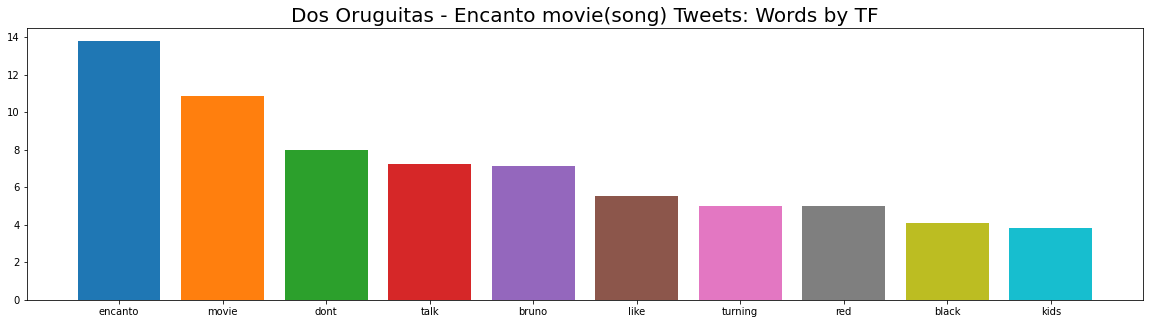

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Compute term frequencies
tf = word_vec.divide(np.sum(word_vec, axis=1), axis=0)

tf_dict = {}
for column in tf:  tf_dict[column] = tf[column].sum()
tf_words = sorted(tf_dict.items(), key=lambda item: item[1], reverse=True)[:10]

labels = [w[0] for w in tf_words]
values = [w[1] for w in tf_words]
indexes = np.arange(len(labels))

f, ax = plt.subplots(figsize=(20,5))
cmap = plt.cm.tab10
plt.bar(indexes, values, color=cmap(np.arange(len(df)) % cmap.N))
plt.xticks(indexes, labels)
plt.title('We dont talk about Bruno - Encanto movie(song) Tweets: Words by TF', fontsize=20)
plt.show()

### Term Frequency - Inverse Document Frequency (TF-IDF)

*Applying the Inverse document frecuency of the previous results* 

In [ ]:
# Compute inverse document frequencies
idf = np.log10(len(tf) / word_vec[word_vec > 0].count()) 

# Compute TF-IDF vectors
tfidf = np.multiply(tf, idf.to_frame().T)
tfidf

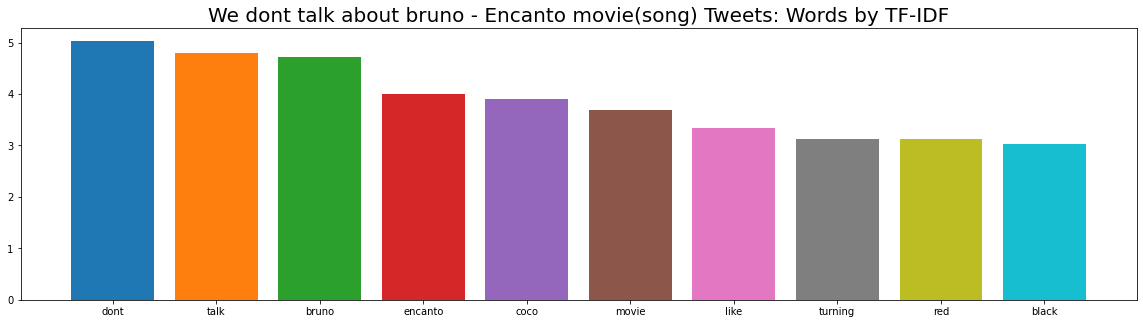

In [ ]:
tfidf_dict = {}
for column in tfidf:  tfidf_dict[column] = tfidf[column].sum()
tfidf_words = sorted(tfidf_dict.items(), key=lambda item: item[1], reverse=True)[:10]

labels = [w[0] for w in tfidf_words]
values = [w[1] for w in tfidf_words]
indexes = np.arange(len(labels))

f, ax = plt.subplots(figsize=(20,5))
cmap = plt.cm.tab10
plt.bar(indexes, values, color=cmap(np.arange(len(df)) % cmap.N))
plt.xticks(indexes, labels)
plt.title('We dont talk about bruno - Encanto movie(song) Tweets: Words by TF-IDF', fontsize=20)
plt.show()

*Interpretation of results: 
The first graph expose the higher used words from that data set, in this case are from the song "We don't talk about bruno" were the mayority of the words are base on the keywords applyed for the collection, eventhough other words that appeared are "like" and noticing that this data set had a repeatendly mention of a new movie "turning red". It showed that those tweets were correlating both movies as a cleaming for develop a similar type of movies for or base on black kids*

### Sentiment Analysis with VADER

*Here we use the dictionary VADER to analyze the positive, negative or neutral words that the tweets have base on the collection did it on the previous mentions songs.*

In [ ]:
from collections import Counter 

# Initialize the VADER sentiment analyzer
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
counter = Counter(sid.lexicon) 

# Finding 20 highest values 
print ('\nMost positive words')
highest = counter.most_common()[0:10]
for entry in highest: 
  print(entry[0]," :",entry[1]," ") 

# Finding 20 lowest values 
print ('\nMost negative words')
lowest = counter.most_common()[-10:-1]
for entry in lowest[:10]: print(entry[0]," :",entry[1]," ") 

In [ ]:
# Compute VADER scores
df_bruno['scores'] = df_bruno['text'].apply(lambda text: sid.polarity_scores(text))
df_bruno['compound']  = df_bruno['scores'].apply(lambda score_dict: score_dict['compound'])
df_bruno['comp_score'] = df_bruno['compound'].apply(lambda c: 'pos' if c >0 else 'neg' if c <0 else 'neu') #make a grafic out of this
df_bruno[['text','scores','compound','comp_score']].head(100)

#df_oruguitas['scores'] = df_oruguitas['text'].apply(lambda text: sid.polarity_scores(text))
#df_oruguitas['compound']  = df_oruguitas['scores'].apply(lambda score_dict: score_dict['compound'])
#df_oruguitas['comp_score'] = df_oruguitas['compound'].apply(lambda c: 'pos' if c >0 else 'neg' if c <0 else 'neu') #make a grafic out of this
#df_oruguitas[['text','scores','compound','comp_score']].head(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,text,scores,compound,comp_score
0,Yeah its called Encanto,"{'neg': 0.0, 'neu': 0.577, 'pos': 0.423, 'comp...",0.2960,pos
1,i want a movie like encanto or turning red so...,"{'neg': 0.238, 'neu': 0.536, 'pos': 0.226, 'co...",-0.2940,neg
2,i want a movie like encanto or turning red so...,"{'neg': 0.238, 'neu': 0.536, 'pos': 0.226, 'co...",-0.2940,neg
3,But encanto *checks notes* was Black.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
4,i want a movie like encanto or turning red so...,"{'neg': 0.238, 'neu': 0.536, 'pos': 0.226, 'co...",-0.2940,neg
...,...,...,...,...
95,i want a movie like encanto or turning red so...,"{'neg': 0.238, 'neu': 0.536, 'pos': 0.226, 'co...",-0.2940,neg
96,🚨ALE 🚨 This is a friendly reminder to purchase...,"{'neg': 0.0, 'neu': 0.736, 'pos': 0.264, 'comp...",0.7269,pos
0,so funny how some of those exact criticisms ca...,"{'neg': 0.067, 'neu': 0.835, 'pos': 0.097, 'co...",0.1646,pos
1,what the fuck is with the onward slander recen...,"{'neg': 0.171, 'neu': 0.537, 'pos': 0.293, 'co...",0.3612,pos


## Topic Modelling

*Get every json and jsonl in WI_corpus*

*Clean and merge data*

*Apply LDA*

In [ ]:
import nltk
nltk.download('stopwords')

import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
     |████████████████████████████████| 1.7 MB 2.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=5a0a15b799081281d044b6a24b9c3185af8b5bae23127b121066ccd79702f0cf
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
def topics_balls(list_of_comment):
  #####separate word
  def sent_to_words(sentences):
      for sentence in sentences:
          yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

  data_words = list(sent_to_words(list_of_comment))

  print('data word: ',data_words[:10])

  data_words = list_of_comment
  #### second cleaning
  # NLTK Stop words
  from nltk.corpus import stopwords
  stop_words = stopwords.words('english')
  stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

  #####trigram or bigram
  bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
  trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

  # Faster way to get a sentence clubbed as a trigram/bigram
  bigram_mod = gensim.models.phrases.Phraser(bigram)
  trigram_mod = gensim.models.phrases.Phraser(trigram)

  # See trigram example
  print([g for g in trigram_mod[bigram_mod[data_words[0]]] if '_'  in g])

  # Define functions for stopwords, bigrams, trigrams and lemmatization
  def remove_stopwords(texts):
      return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

  def make_bigrams(texts):
      return [bigram_mod[doc] for doc in texts]

  def make_trigrams(texts):
      return [trigram_mod[bigram_mod[doc]] for doc in texts]

  def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
      """https://spacy.io/api/annotation"""
      texts_out = []
      for sent in texts:
          doc = nlp(" ".join(sent)) 
          texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
      return texts_out

  # Remove Stop Words
  data_words_nostops = remove_stopwords(data_words)

  # Form Bigrams
  data_words_bigrams = make_bigrams(data_words_nostops)

  # Initialize spacy 'en' model, keeping only tagger component (for efficiency)
  # python3 -m spacy download en
  nlp = spacy.load('en', disable=['parser', 'ner'])

  # Do lemmatization keeping only noun, adj, vb, adv
  data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

  #print(data_lemmatized[:5])

  # Create Dictionary
  id2word = corpora.Dictionary(data_lemmatized)

  # Create Corpus
  texts = data_lemmatized

  # Term Document Frequency
  corpus = [id2word.doc2bow(text) for text in texts]

  # View
  #print(corpus[:5])
  # Build LDA model
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=20, 
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)
  # Print the Keyword in the 10 topics
  pprint(lda_model.print_topics())
  doc_lda = lda_model[corpus]
  print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

  # # Compute Coherence Score
  coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  print('\nCoherence Score: ', coherence_lda)

  pyLDAvis.enable_notebook()
  vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds = 'mmds')
  # pyLDAvis.show(vis)
  return vis


In [ ]:
topics_balls(list_of_comment) #yt topics
topics_balls(df['text']) #tw topics

data word:  [[], ['some', 'of', 'the', 'scenes', 'are', 'not', 'in', 'the', 'movie'], ['at', 'it', 'not', 'real'], [], ['that', 'is', 'just', 'good', 'video'], ['call', 'it', 'the', 'not', 'special', 'special'], ['who', 'knew', 'one', 'small', 'trailer', 'caused', 'the', 'biggest', 'disney', 'fandom', 'of', 'all', 'time'], ['some', 'of', 'the', 'trailer', 'scenes', 'in', 'this', 'video', 'is', 'deleted', 'and', 'just', 'used', 'for', 'the', 'trailer', 'to', 'make', 'more', 'people', 'interested', 'in', 'watching', 'this', 'movie'], ['this', 'is', 'basically', 'the', 'satisfying', 'thing', 'have', 'ever', 'seen'], ['it', 'so', 'funny', 'looking', 'at', 'the', 'comments', 'trying', 'to', 'guess', 'ending', 'by', 'saying', 'something', 'generic', 'ps', 'they', 'were', 'way', 'off']]
[]


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


[(0,
  '0.015*"blow" + 0.015*"better" + 0.015*"lonely" + 0.015*"would" + '
  '0.015*"underestimate" + 0.015*"think" + 0.015*"much" + 0.015*"month" + '
  '0.015*"come" + 0.015*"actually"'),
 (1,
  '0.015*"blow" + 0.015*"better" + 0.015*"lonely" + 0.015*"would" + '
  '0.015*"underestimate" + 0.015*"think" + 0.015*"much" + 0.015*"month" + '
  '0.015*"come" + 0.015*"actually"'),
 (2,
  '0.015*"blow" + 0.015*"better" + 0.015*"lonely" + 0.015*"would" + '
  '0.015*"underestimate" + 0.015*"think" + 0.015*"much" + 0.015*"month" + '
  '0.015*"come" + 0.015*"actually"'),
 (3,
  '0.015*"blow" + 0.015*"better" + 0.015*"lonely" + 0.015*"would" + '
  '0.015*"underestimate" + 0.015*"think" + 0.015*"much" + 0.015*"month" + '
  '0.015*"come" + 0.015*"actually"'),
 (4,
  '0.015*"blow" + 0.015*"better" + 0.015*"lonely" + 0.015*"would" + '
  '0.015*"underestimate" + 0.015*"think" + 0.015*"much" + 0.015*"month" + '
  '0.015*"come" + 0.015*"actually"'),
 (5,
  '0.247*"lonely" + 0.012*"blow" + 0.012*"better" 

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


data word:  [['you', 'need', 'to', 'see', 'encanto', 'love', 'that', 'movie'], ['does', 'my', 'kid', 'like', 'the', 'movie', 'encanto', 'no', 'do', 'we', 'have', 'to', 'watch', 'the', 'encanto', 'music', 'videos', 'times', 'day', 'no', 'we', 'watch', 'them', 'times'], ['encanto', 'no', 'me', 'gusto', 'pero', 'dos', 'oruguitas', 'tiene', 'algo', 'especial', 'es', 'el', 'unico', 'momento', 'en', 'que', 'esta', 'pelicula', 'te', 'rompe', 'dtgispvtx'], ['love', 'this', 'movie'], ['lets', 'maybe', 'not', 'overshadow', 'the', 'cultural', 'value', 'to', 'this', 'movie', 'by', 'throwing', 'labels', 'and', 'headcanons', 'at', 'it', 'tdh', 'ofvjj'], ['rt', 'hate', 'to', 'say', 'this', 'but', 'you', 're', 'not', 'gonna', 'get', 'it', 'from', 'pixar', 'it', 'important', 'that', 'we', 'find', 'black', 'animators', 'and', 'creators', 'in', 'ord'], ['rt', 'want', 'movie', 'like', 'encanto', 'or', 'turning', 'red', 'so', 'badly', 'for', 'black', 'kids'], ['rt', 'triunfa', 'cantando', 'dos', 'oruguitas

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


[]
[(0,
  '0.061*"think" + 0.050*"event" + 0.044*"order" + 0.038*"art" + '
  '0.037*"together" + 0.020*"เหมยล" + 0.019*"live" + 0.016*"content" + '
  '0.016*"add" + 0.016*"exclusive"'),
 (1,
  '0.133*"see" + 0.076*"mean" + 0.074*"wonderful" + 0.068*"lot" + '
  '0.066*"money" + 0.066*"terrific" + 0.066*"raise" + 0.066*"voting" + '
  '0.044*"person" + 0.029*"fan"'),
 (2,
  '0.225*"movie" + 0.148*"turn" + 0.102*"red" + 0.098*"black" + 0.094*"kid" + '
  '0.093*"want" + 0.089*"badly" + 0.009*"first" + 0.007*"perform" + '
  '0.006*"trauma"'),
 (3,
  '0.076*"night" + 0.051*"last" + 0.047*"soul" + 0.041*"attend" + 0.040*"look" '
  '+ 0.032*"nominee" + 0.031*"literally" + 0.028*"reporter" + 0.023*"minute" + '
  '0.023*"allow"'),
 (4,
  '0.235*"make" + 0.040*"wonder" + 0.040*"game" + 0.033*"life" + 0.028*"right" '
  '+ 0.023*"miss" + 0.023*"hopefully" + 0.019*"happen" + 0.015*"fantastic" + '
  '0.015*"pretty"'),
 (5,
  '0.159*"people" + 0.158*"good" + 0.058*"film" + 0.047*"disney" + '
  '0.038*"

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.302714  0.393790       1        1  14.502312
10    -0.040490 -0.427600       2        1   7.617026
8      0.241774  0.276715       3        1   7.420460
1     -0.264945 -0.301862       4        1   6.394512
14    -0.244444  0.241366       5        1   6.356723
17     0.042402  0.405890       6        1   6.041040
16     0.381682 -0.039589       7        1   5.299727
5     -0.347103 -0.051709       8        1   4.521968
19     0.058252  0.235094       9        1   4.473361
11    -0.111587  0.149336      10        1   4.253109
9     -0.231209 -0.155720      11        1   3.961778
12     0.091604 -0.166773      12        1   3.713655
18    -0.253561  0.047227      13        1   3.638040
13     0.264712 -0.230603      14        1   3.637891
7      0.226691 -0.070215      15        1   3.404868
15     0.150608  0.057073      16        1   3.299786
6      0.295660  0.129476      17        1   3.264855
4      0.113346 -0.300584      18        1   3.234528
0     -0.065569 -0.163949      19        1   2.916113
3     -0.005110 -0.027362      20        1   2.048246, topic_info=            Term        Freq       Total Category  logprob  loglift
147         talk   71.000000   71.000000  Default  30.0000  30.0000
1          movie  136.000000  136.000000  Default  29.0000  29.0000
28          turn   70.000000   70.000000  Default  28.0000  28.0000
50          year   45.000000   45.000000  Default  27.0000  27.0000
96           get   41.000000   41.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
41      daezvkfq    0.219546    0.891733  Topic20  -5.7129   2.4866
88   worldbuilde    0.219546    0.891733  Topic20  -5.7129   2.4866
85        manage    0.197995    1.138454  Topic20  -5.8162   2.1390
84          last    3.410099   26.363784  Topic20  -2.9699   1.8429
372      nominee    2.114382   30.801139  Topic20  -3.4479   1.2094

[670 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
480       3  0.875595    academy
805       6  0.574731   acapella
495       2  0.814739        act
925      17  0.508027   activism
152      16  0.907949      actor
...     ...       ...        ...
69       10  0.631971  yesterday
914      17  0.299080        yet
914      18  0.299080        yet
154      16  0.610225    youtxbm
293      19  0.775512      เหมยล

[611 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 11, 9, 2, 15, 18, 17, 6, 20, 12, 10, 13, 19, 14, 8, 16, 7, 5, 1, 4])

*Interpretation of results*

## Compare Different Social Networks (Sentiment Analysis)

*Segment data by social network*

*Apply VADER sentiment analysis for each group*

*Represent in a scatter by social network*

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from collections import Counter   
import pandas as pd
nltk.download('stopwords')
nltk.download('vader_lexicon')

def add_sentiment(list_of_comment):
  # Extract tokens, generate count vectors and remove stopwords
  tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
  df = pd.DataFrame(list_of_comment, columns = ['text'])
  word_vec = df['text'].apply(str.lower).apply(tokenizer.tokenize).apply(pd.value_counts).fillna(0)
  word_vec = word_vec.drop(stopwords.words('english')+['https','co'], axis=1, errors='ignore').fillna(0)
  word_vec

  # Initialize the VADER sentiment analyzer
  from nltk.sentiment.vader import SentimentIntensityAnalyzer
  sid = SentimentIntensityAnalyzer()
  counter = Counter(sid.lexicon) 

  # Finding 20 highest values 
  # print ('\nMost positive words')
  highest = counter.most_common()[0:10]
  for entry in highest: 
    print(entry[0]," :",entry[1]," ") 

  # Finding 20 lowest values 
  print ('\nMost negative words')
  lowest = counter.most_common()[-10:-1]
  for entry in lowest[:10]: print(entry[0]," :",entry[1]," ") 
  # Compute VADER scores
  df['scores'] = df['text'].apply(lambda text: sid.polarity_scores(text))
  df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
  df['neg'] = df['scores'].apply(lambda x: x['neg'])
  df['pos'] = df['scores'].apply(lambda x: x['pos'])
  df['neu'] = df['scores'].apply(lambda x: x['neu'])
  df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >0 else 'neg' if c <0 else 'neu')
  return df

#YT
add_sentiment(list_of_comment).sample(5)
#TW
add_sentiment(df['text']).sample(5)

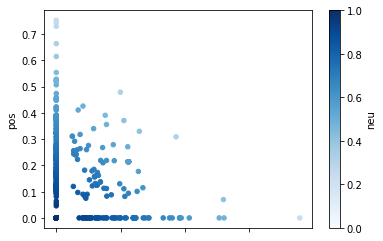

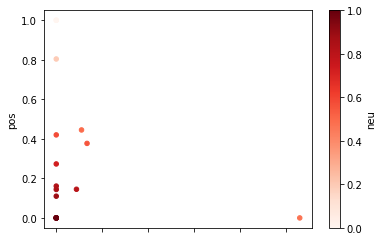

In [ ]:
yt = add_sentiment(list_of_comment)
yt.insert(0,'network','YouTube')


tw = add_sentiment(df['text'])
tw.insert(0,'network','Twitter')

df_p = pd.concat([tw,yt])
df_p.sample(5)

df_p[df_p['network'] == 'Twitter'].plot.scatter(x='neg',
  y='pos',
  c='neu',
  colormap='Blues'
)


df_p[df_p['network'] == 'YouTube'].plot.scatter(x='neg',
  y='pos',
  c='neu',
  colormap='Reds'
)

## Most frecuent words

*Tf-idf anlaysis for every comments*

*Tf-idf anlaysis removing film specific words*

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


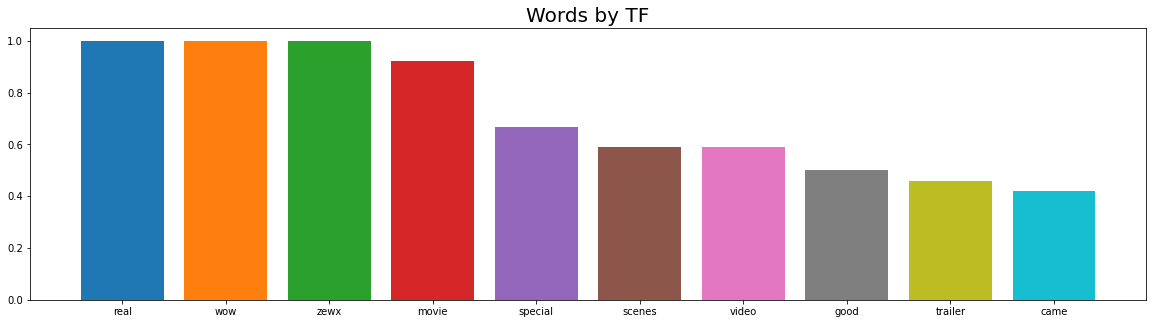

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.


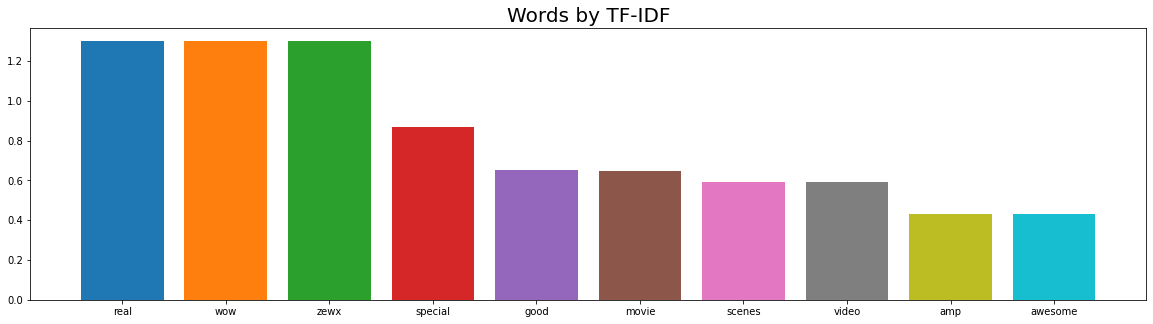

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords  
nltk.download('stopwords')
import numpy as np
import matplotlib.pyplot as plt


def TF_and_IDF(list_of_comment):
  # Extract tokens, generate count vectors and remove stopwords
  tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
  df = pd.DataFrame(list_of_comment, columns = ['text'])
  word_vec =  df['text'].apply(str.lower).apply(tokenizer.tokenize).apply(pd.value_counts).fillna(0)
  word_vec = word_vec.drop(stopwords.words('english')+['https','co'], axis=1, errors='ignore').fillna(0)
  word_vec

  # Compute term frequencies
  tf = word_vec.divide(np.sum(word_vec, axis=1), axis=0)

  tf_dict = {}
  for column in tf:  tf_dict[column] = tf[column].sum()
  tf_words = sorted(tf_dict.items(), key=lambda item: item[1], reverse=True)[:10]

  labels = [w[0] for w in tf_words]
  values = [w[1] for w in tf_words]
  indexes = np.arange(len(labels))

  f, ax = plt.subplots(figsize=(20,5))
  cmap = plt.cm.tab10
  plt.bar(indexes, values, color=cmap(np.arange(len(df)) % cmap.N))
  plt.xticks(indexes, labels)
  plt.title('Words by TF', fontsize=20)
  plt.show()

  # Compute inverse document frequencies
  idf = np.log10(len(tf) / word_vec[word_vec > 0].count()) 

  # Compute TF-IDF vectors
  tfidf = np.multiply(tf, idf.to_frame().T)
  tfidf


  tfidf_dict = {}
  for column in tfidf:  tfidf_dict[column] = tfidf[column].sum()
  tfidf_words = sorted(tfidf_dict.items(), key=lambda item: item[1], reverse=True)[:10]

  labels = [w[0] for w in tfidf_words]
  values = [w[1] for w in tfidf_words]
  indexes = np.arange(len(labels))

  f, ax = plt.subplots(figsize=(20,5))
  cmap = plt.cm.tab10
  plt.bar(indexes, values, color=cmap(np.arange(len(df)) % cmap.N))
  plt.xticks(indexes, labels)
  plt.title('Words by TF-IDF', fontsize=20)
  plt.show()



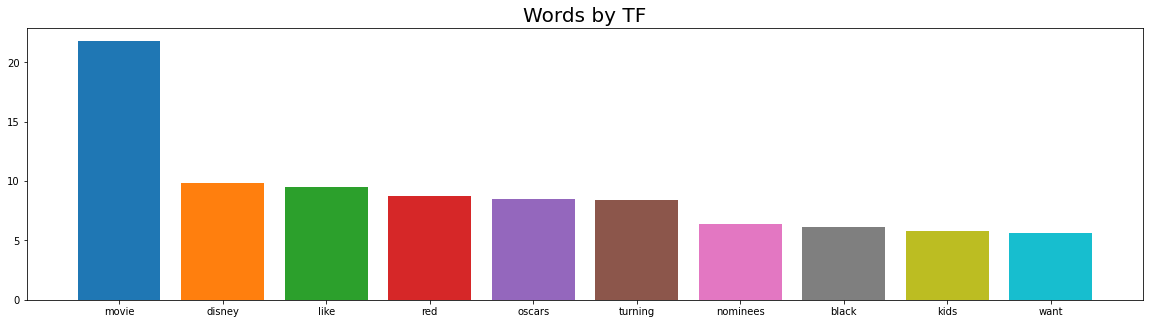

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.


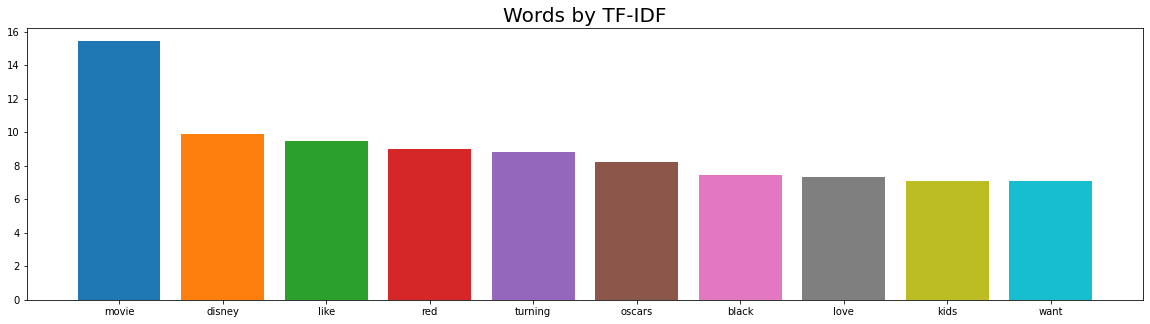

In [ ]:
def remove_word(list_of_comment, regex:str):
   return [re.sub(regex, "", sent.lower()) for sent in list_of_comment]

df_no_specific = df['text']
#clean
df_no_specific = remove_word(df_no_specific,'qlwzgm')
df_no_specific = remove_word(df_no_specific,'rt')
df_no_specific = remove_word(df_no_specific,'gxnokfejh')
df_no_specific = remove_word(df_no_specific,'rea')

#main topic
df_no_specific = remove_word(df_no_specific,'encanto')
df_no_specific = remove_word(df_no_specific,'dos')
df_no_specific = remove_word(df_no_specific,'oruguitas')
df_no_specific = remove_word(df_no_specific,'dont')
df_no_specific = remove_word(df_no_specific,'talk')
df_no_specific = remove_word(df_no_specific,'bruno')
# df_no_specific = remove_word(df_no_specific,'oscar')

TF_and_IDF(df_no_specific)

In [ ]:
df_red = pd.DataFrame(df_no_specific, columns = ['text'])
is_red = list(map(lambda x: x.find("red") != -1, df_red['text']))
df_red[is_red]


,text
6,i want a movie like or turning red so badly ...
11,i want a movie like or turning red so badly ...
15,no but i was saying this while watching turni...
27,i want a movie like or turning red so badly ...
29,100% jared bush pls make it happen
...,...
777,why is it that every other movie gets to have...
778,i want a movie like or turning red so badly ...
781,i want a movie like or turning red so badly ...
783,i want a movie like or turning red so badly ...


## External Sources

*As external sources we decide to collect as many relevant information that is available on internet to have a clear understanding about it besides the perception or importance that it has nowadays.*
*Implementing the search from the Wikipedia API to visualize the reach of visitis to the Encanto(film) page either in English as Spanish*

### Wikipedia pages views 

In [ ]:
!pip install pageviewapi
!pip install mwparserfromhell

In [ ]:
import pageviewapi
import pandas as pd

In [ ]:
#Creating a function for monthly views in english
def getPageviewsMonthlyEn(page,project='en.wikipedia',start_date='20211101',end_date='20220310'):
  viewsen = pageviewapi.per_article(project, page, start_date,end_date,
                        access='all-access', agent='user', granularity='monthly')
  viewsen = pd.DataFrame(viewsen['items'])
  viewsen.index = pd.to_datetime(viewsen['timestamp'],format='%Y%m%d%H')
  return viewsen[['article','views']]

In [ ]:
#function for monthly views in spanish
def getPageviewsMonthlySp(page,project='es.wikipedia',start_date='20211101',end_date='20220310'):
  views = pageviewapi.per_article(project, page, start_date,end_date,
                        access='all-access', agent='user', granularity='monthly')
  views = pd.DataFrame(views['items'])
  views.index = pd.to_datetime(views['timestamp'],format='%Y%m%d%H')
  return views[['article','views']]

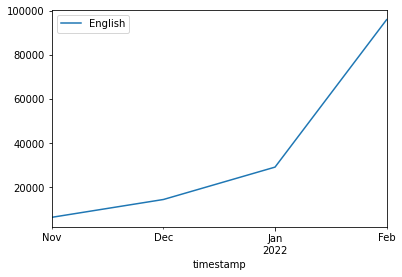

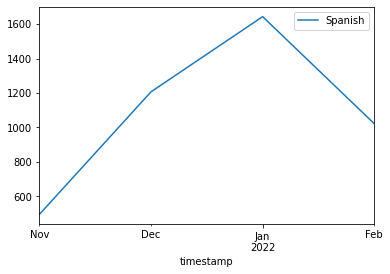

In [ ]:
page1= 'Encanto'
page1_viewsen = getPageviewsMonthlyEn(page1, start_date='20211101',end_date='20220310')
page1_views = getPageviewsMonthlySp(page1, start_date='20211101',end_date='20220310')

page1_viewsen.plot(y='views', label='English')
page1_views.plot(y='views', label='Spanish')

*The graphs presented with a high diference the amount of people that visited both pages, even though the movie was base on a spanish culture the english page had a enourmous visits compared to the spanish one. Furthermore, the high peaks for the spanish version was on January 2022 and in english came a month later on 2022.*  

### Article's content

*In this section we focus to recall general information of the movie* 

### Page of Encanto (Film)
*Extract some information from the principal page a general description as the soundtrack section on the page*
  

In [ ]:
import requests
def getArticle(page,project='en.wikipedia'):
  url = a ='https://{project}.org/w/api.php?action=query&prop=revisions&titles={page}&rvslots=*&rvprop=content&formatversion=2&format=json'.format(project=project,page=page)
  data = requests.get(url).json()
  return data['query']['pages'][0]['revisions'][0]['slots']['main']['content']

In [ ]:
page= 'Encanto (film)' 
content = getArticle(page)
print(content[0:20000])

In [ ]:
## Remove wikitext markup language
import mwparserfromhell as mw
parsed = mw.parse(content)
parsed.strip_code()

'Encanto is a 2021 American computer-animated musical fantasy comedy film produced by Walt Disney Animation Studios and distributed by Walt Disney Studios Motion Pictures. The 60th film produced by the studio, it was directed by Jared Bush and Byron Howard, co-directed by Charise Castro Smith, who co-wrote the screenplay with Bush, and produced by Yvett Merino and Clark Spencer, with original songs by Lin-Manuel Miranda.\n\nStarring the voices of Stephanie Beatriz, María Cecilia Botero, John Leguizamo, Mauro Castillo, Jessica Darrow, Angie Cepeda, Carolina Gaitán, Diane Guerrero, and Wilmer Valderrama, the film follows a multigenerational Colombian family, the Madrigals, led by a matriarch whose children and grandchildren—except for Mirabel Madrigal (Beatriz)—receive magical gifts from a miracle that helps them serve the people in their rural community called the Encanto. When Mirabel learns that the family is losing their magic, she sets out to find out what is happening, and save her

In [ ]:
parsed.get_sections()

['{{pp|small=yes}}\n{{Short description|2021 film by Jared Bush and Byron Howard}}\n{{Use American English|date=December 2021}}\n{{Use mdy dates|date=December 2021}}\n{{Infobox film\n| name           = Encanto\n| image          = Encanto poster.jpg\n| alt            = \n| caption        = Theatrical release poster\n| director       = {{Plainlist|\n* [[Jared Bush]]\n* [[Byron Howard]]\n}}\n| producer       = {{Plainlist|\n* [[Yvett Merino]]\n* [[Clark Spencer]]\n}}\n| screenplay     = {{Plainlist|\n* [[Charise Castro Smith]]\n* Jared Bush\n}}\n| story          = {{Plainlist| \n* Jared Bush\n* Byron Howard\n* Charise Castro Smith\n* Jason Hand\n* [[Nancy Kruse]]\n* [[Lin-Manuel Miranda]]\n}}\n| starring       = {{Plainlist|\n* [[Stephanie Beatriz]]\n* [[María Cecilia Botero]]\n* [[John Leguizamo]]\n* Mauro Castillo\n* [[Jessica Darrow]]\n* [[Angie Cepeda]]\n* [[Carolina Gaitán]]\n* [[Diane Guerrero]]\n* [[Wilmer Valderrama]]\n}}\n| music          = [[Germaine Franco]]\n| cinematography =

In [ ]:
section= parsed.get_sections()[9]
print(section)

==Soundtrack==
{{main|Encanto (soundtrack)}}
In June 2020, Miranda publicly revealed that he had begun to write the film's music, which would have eight original songs in both Spanish and English.<ref name="Miranda2020" /> After the film's premiere, he disclosed that he had been writing songs for the film from the very beginning.<ref name="Ordona" /> On September 8, 2021, [[Germaine Franco]], co-composer of the songs for ''[[Coco (2017 film)|Coco]]'' (2017), began to score the film.<ref>{{Cite tweet |author=Jared Bush|author-link=Jared Bush|user=thejaredbush|number=1435404620495405061|title=I feel so lucky to be surrounded by amazing artists all collectively bringing a new story to life. DAY ONE of score recording is such an incomparable highlight. This score is a triumph. Can’t wait to share who wrote it and for you all to hear it and cry your eyes out.❤️🦋#Encanto}}</ref><ref>{{cite tweet|number=1436422318524272642|user=filmmusicrep|title='Dora and the Lost City of Gold' &amp; 'Tag' c

In [ ]:
## Remove wikitext markup language for section
parsed = mw.parse(section)
parsed.strip_code()

'Soundtrack\n\nIn June 2020, Miranda publicly revealed that he had begun to write the film\'s music, which would have eight original songs in both Spanish and English. After the film\'s premiere, he disclosed that he had been writing songs for the film from the very beginning. On September 8, 2021, Germaine Franco, co-composer of the songs for Coco (2017), began to score the film. The soundtrack was released on November 19, 2021 and reached number one on the US Billboard 200, becoming the first Disney soundtrack since that of Frozen II (2019) to top the chart. The track "We Don\'t Talk About Bruno" was a viral sensation. It broke various records and became one of Disney\'s most successful songs of all time. It topped the US Billboard Hot 100 and the UK Singles Chart, and marked Disney\'s first number-one song on the former in the 21st century and its first-ever on the latter.'

### Page of Encanto (Soundtrack)
*Extract some information from the soundtrack of the movie a general description as the songs it have*
*I take our atention that most of the song or even all have their english and spanish version something out of normal*  

In [ ]:
page= 'Encanto (soundtrack)'
content2 = getArticle(page)
print(content2[0:30000])

In [ ]:
parsed2 = mw.parse(content2)
parsed2.strip_code()

'Encanto (Original Motion Picture Soundtrack) is the soundtrack album to Disney\'s 2021 film of the same name. Released by Walt Disney Records on November 19, 2021, the album contains eight original songs written by Lin-Manuel Miranda and produced by Mike Elizondo that were recorded by various singers, and 27 score pieces composed by Germaine Franco. It has been released in 44 languages of the world, other than English and Spanish.\n\nTo develop the soundtrack, Miranda and team visited Colombia—the setting of Encanto—to study the country\'s music. Consequentially, the album is rooted in genres such as vallenato, cumbia, bambuco and rock en español, making use of the traditional music instruments of Colombia, and incorporates salsa, tango, reggaeton and bachata styles alongside pop, hip hop, folk and musical theatre elements. In the film, the songs are performed by the Madrigals, who are a multigenerational family with magical powers granted to them by a "miracle"; the lyrical themes re

In [ ]:
section2 = parsed2.get_sections()[5]
print(section2)

== Track listing ==
All songs are written by [[Lin-Manuel Miranda]]. All scores composed by [[Germaine Franco]].
{{Track listing
| headline = ''Encanto (Original Motion Picture Soundtrack)'' track listing
| total_length = 114:41
| extra_column = Performer(s)
| title1 = [[The Family Madrigal]]
| extra1 = [[Stephanie Beatriz]], [[Olga Merediz]] & cast of ''Encanto''
| length1 = 4:17
| title2 = Waiting on a Miracle
| extra2 = Beatriz
| length2 = 2:41
| title3 = [[Surface Pressure]]
| extra3 = [[Jessica Darrow]]
| length3 = 3:22
| title4 = [[We Don't Talk About Bruno]]
| extra4 = [[Adassa]], Beatriz, Mauro Castillo, [[Rhenzy Feliz]], [[Carolina Gaitán]], [[Diane Guerrero]] & cast of ''Encanto''
| length4 = 3:36
| title5 = What Else Can I Do?
| extra5 = Beatriz & Guerrero
| length5 = 2:59
| title6 = [[Dos Oruguitas]]
| extra6 = [[Sebastián Yatra]]
| length6 = 3:34
| title7 = All of You
| extra7 = Adassa, Beatriz, [[John Leguizamo]], Merediz, [[Maluma]] & cast of ''Encanto''
| length7 = 4:38

### Page of 94th Academy Awards
*Extract information from the nominees, the nominations encanto film have in addition to the related links that it has the page*  
*The film present 3 nominations including the related links of the principal page of Encanto's movie on wikipedia*

In [ ]:
page= '94th Academy Awards' 
content = getArticle(page)
print(content[0:20000])

In [ ]:
## Remove wikitext markup language
import mwparserfromhell as mw
parsed = mw.parse(content)
parsed.strip_code()

'The 94th Academy Awards ceremony, presented by the Academy of Motion Picture Arts and Sciences (AMPAS), will honor the best films released between March 1 and December 31, 2021, and is scheduled to take place at the Dolby Theatre in Hollywood, Los Angeles, California, on March 27, 2022, hosted by Regina Hall, Amy Schumer and Wanda Sykes. Shortlists of films to compete for nominations in ten categories were announced on December 21, 2021. The nominations were announced on February 8, 2022, by actors Tracee Ellis Ross and Leslie Jordan. It will be the first time since the 83rd Academy Awards in 2011 where the ceremony will feature multiple hosts.\n\n Ceremony information \nDue to the continued impact of the COVID-19 pandemic on cinema, the modified eligibility criteria from the 93rd Academy Awards (such as the inclusion of direct-to-digital releases and providing flexibility for eligible theatrical runs in cities besides Los Angeles) remained in force. Because the 93rd Academy Awards ha

In [ ]:
parsed.get_sections()

['{{Oscars short description|films-year=2021}}\n{{Use American English|date=February 2022}}\n{{Use mdy dates|date=February 2022}}\n{{Infobox film awards\n| number           = 94\n| award            = Academy Awards\n| image            = 94 Oscars.jpg\n| caption          = Official poster\n| date             = March 27, 2022\n| site             = [[Dolby Theatre]] <br /> [[Hollywood]], Los Angeles, California, U.S.\n| host             = {{Plainlist|\n*[[Regina Hall]]\n*[[Amy Schumer]]\n*[[Wanda Sykes]]\n}}\n| preshow          = \n| postshow         = \n| producer         = [[Will Packer]]\n| director         = [[Glenn Weiss]]\n| best_picture     = TBA\n| most_wins        = TBA\n| network          = [[American Broadcasting Company|ABC]]\n| most_nominations = \'\'[[The Power of the Dog (film)|The Power of the Dog]]\'\' (12)\n| duration         = TBA\n| ratings          = TBA\n| last             = 93rd\n| next             = 95th\n}}\n\nThe \'\'\'94th Academy Awards\'\'\' ceremony, presente

In [ ]:
section= parsed.get_sections()[6]
print(section)

== Nominees ==
''[[The Power of the Dog (film)|The Power of the Dog]]'' is the first film directed by a woman to receive more than ten nominations while its director, [[Jane Campion]], is the first woman to receive more than one Academy Award nomination for [[Academy Award for Best Director|Best Director]].<ref>{{cite web |url=https://www.cnn.com/2022/02/08/entertainment/jane-campion-oscars-history/index.html |title=Jane Campion scores her second best director Oscar nomination, making history |last=Gonzalez |first=Sarah |publisher=[[CNN]] |date=February 8, 2022 |access-date=February 10, 2022}}</ref> ''[[CODA (2021 film)|CODA]]'' is the first film from [[Apple TV+|Apple Original Films]], as well as the first starring a predominantly [[Deafness|deaf]] cast in leading roles, to be nominated for [[Academy Award for Best Picture|Best Picture]]; among the cast, [[Troy Kotsur]] is the first deaf male actor to receive a nomination for an acting award (in the category of [[Academy Award for Bes

In [ ]:
parsed.filter_wikilinks()

['[[Dolby Theatre]]',
 '[[Hollywood]]',
 '[[Regina Hall]]',
 '[[Amy Schumer]]',
 '[[Wanda Sykes]]',
 '[[Will Packer]]',
 '[[Glenn Weiss]]',
 '[[American Broadcasting Company|ABC]]',
 '[[The Power of the Dog (film)|The Power of the Dog]]',
 '[[Academy of Motion Picture Arts and Sciences]]',
 '[[2021 in film|films released between March 1 and December 31, 2021]]',
 '[[Dolby Theatre]]',
 '[[Hollywood]]',
 '[[Variety (magazine)#Variety Business Intelligence|Variety Insight]]',
 '[[Academy of Motion Picture Arts and Sciences]]',
 '[[Regina Hall]]',
 '[[Amy Schumer]]',
 '[[Wanda Sykes]]',
 '[[Deadline Hollywood]]',
 '[[American Broadcasting Company]]',
 '[[Tracee Ellis Ross]]',
 '[[Leslie Jordan]]',
 '[[The Hollywood Reporter]]',
 '[[83rd Academy Awards]]',
 '[[The Hollywood Reporter]]',
 '[[impact of the COVID-19 pandemic on cinema]]',
 '[[93rd Academy Awards]]',
 '[[Direct-to-video#Digital releases|direct-to-digital]]',
 '[[Los Angeles]]',
 '[[Variety (magazine)|Variety]]',
 '[[IndieWire]]

# Conclusions

To conclude we evidence that the film has a big social impact with users of both social networks have more positive opinions about it but this change regarding of the social Network. Twitter comments have been more negative than the ones on Youtube. 
Most of the tweets recollected were RT while the Encanto fans also integrated comments related to the next Pixar film released. 
The film had a resonation after couple of months of release this could be due the Awards and/ or nominations it presented. 




# Limitations & Ideas of Future Work

First we can find a limitation finding representative YouTube videos automatically. On the other hand we could improve data twitter samples recording data into our documents collection automatically. Additionally, we tryed to crawle the page of the Academy Awards however the design of it does not allow to extract information easily for this.  


In therms of future ideas it would be interesting to obtain information from other social networks (tik-tok) to evaluate the content generatied around the movie and its songs due that is known that severeal fandom created choreography videos about it plus review the commenst those have had.  